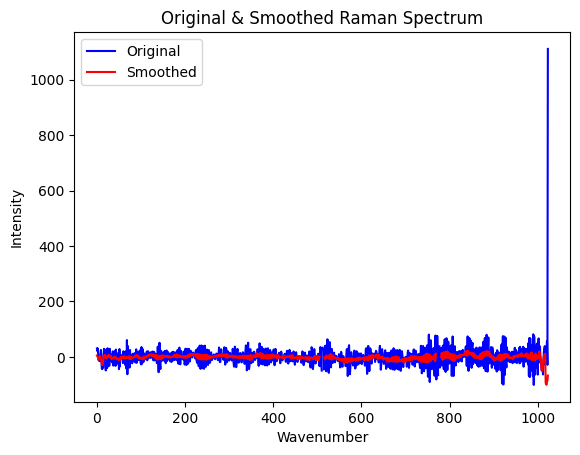

In [1]:
# SAVITSKY-GOLAY (ONE SPECTRUM)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Function to apply Savitzky-Golay filter (sliding window)
def savgol_sliding_window(data, window_size, poly_order):
    n = len(data)
    smoothed_data = np.zeros(n)

    for i in range(n):
        # Define dynamic window boundaries
        start = max(0, i - window_size // 2)
        end = min(n, i + window_size // 2 + 1)

        # Extract subset of data within window
        subset_data = data[start:end]

        # Apply Savitzky-Golay filter with a fixed poly_order
        smoothed_subset = savgol_filter(subset_data, min(end - start - 1, window_size), poly_order)

        # Replace center pixel of window with fitted polynomial value
        smoothed_data[i] = smoothed_subset[len(smoothed_subset) // 2]

    return smoothed_data

# Read CSV file
file_path = '/kaggle/input/corectbaseseveral/corrected_baseline_spectrum1.csv'
df = pd.read_csv(file_path)
savitsky_data = df['Corrected_Intensity'].values

window_size = 11  # size moving window
poly_order = 2    # order Chebyshev polynomial

# polyorder must be less than window_length
smoothed_spectrum = savgol_sliding_window(savitsky_data, window_size=window_size, poly_order=poly_order)

# Plot original & smoothed spectra
plt.plot(savitsky_data, label='Original', color='blue')
plt.plot(smoothed_spectrum, label='Smoothed', color='red')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.title('Original & Smoothed Raman Spectrum')
plt.legend()
plt.show()